# Fast and Slow Pointers

AKA Floyd's tortoise and hare algorithim, or Floyd's algorithim.

Usually this is implemented using linked lists, where we have a `fast` pointer moving twice as fast as the `slow` pointer. Both start at the same starting node.

## Middle of Linked List

> Find the middle of the linked list

BFS will be iterate through LL once, then get the `length`. Iterate from the start again until `length/2`.

While this solution works, there's a more elegant approach:

1. 2 pointers start at head of the LL, `fast` and `slow`
2. `fast` pointer moves twice as fast as `slow`
3. By the time `fast` gets to the end, `slow` will be at the middle of list

The time complexity is $O(n)$ with $O(1)$ space

In [ ]:
def middleOfList(head):
    slow, fast = head, head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    return slow

### Odd Length lists

For odd length lists, the middle elem is well-defined; our solution is guaranteed to find the correct middle elem

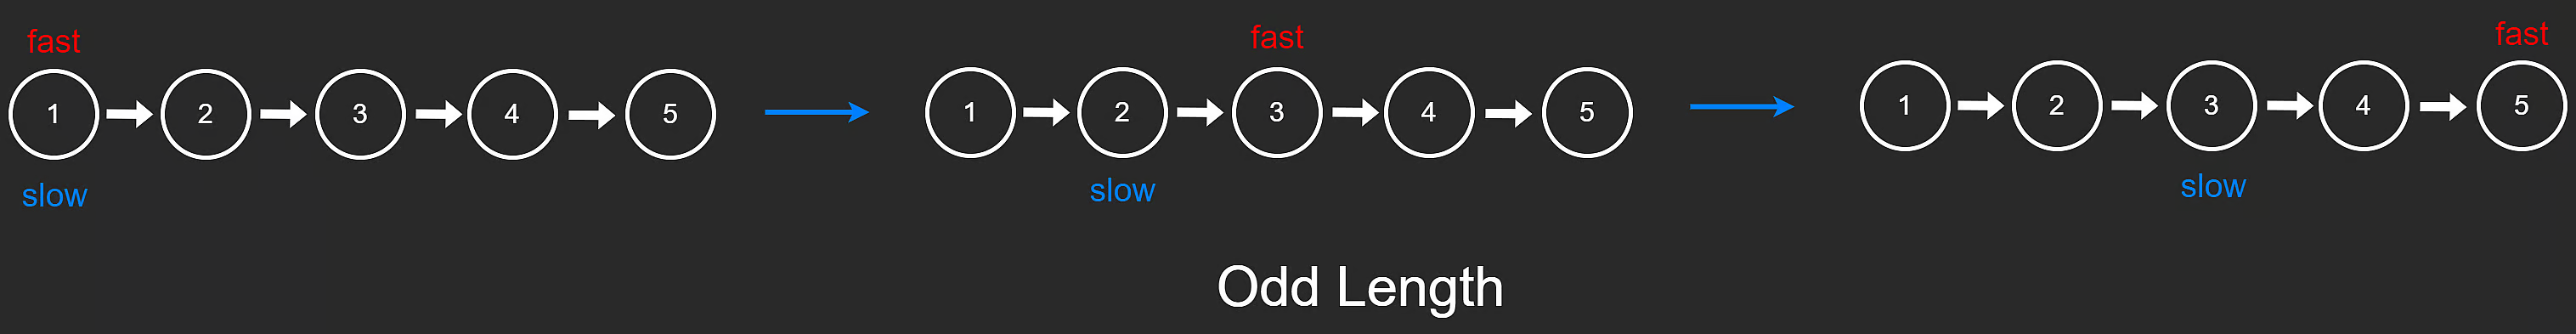

### Even Length lists

For even length lists, the middle elem is a choice between 2 nodes. We can either take the lower elem or the higher elem.

- For the higher elem, we start both `fast` and `slow` at `head`
- For the lower elem, we start `fast` at `slow.next`

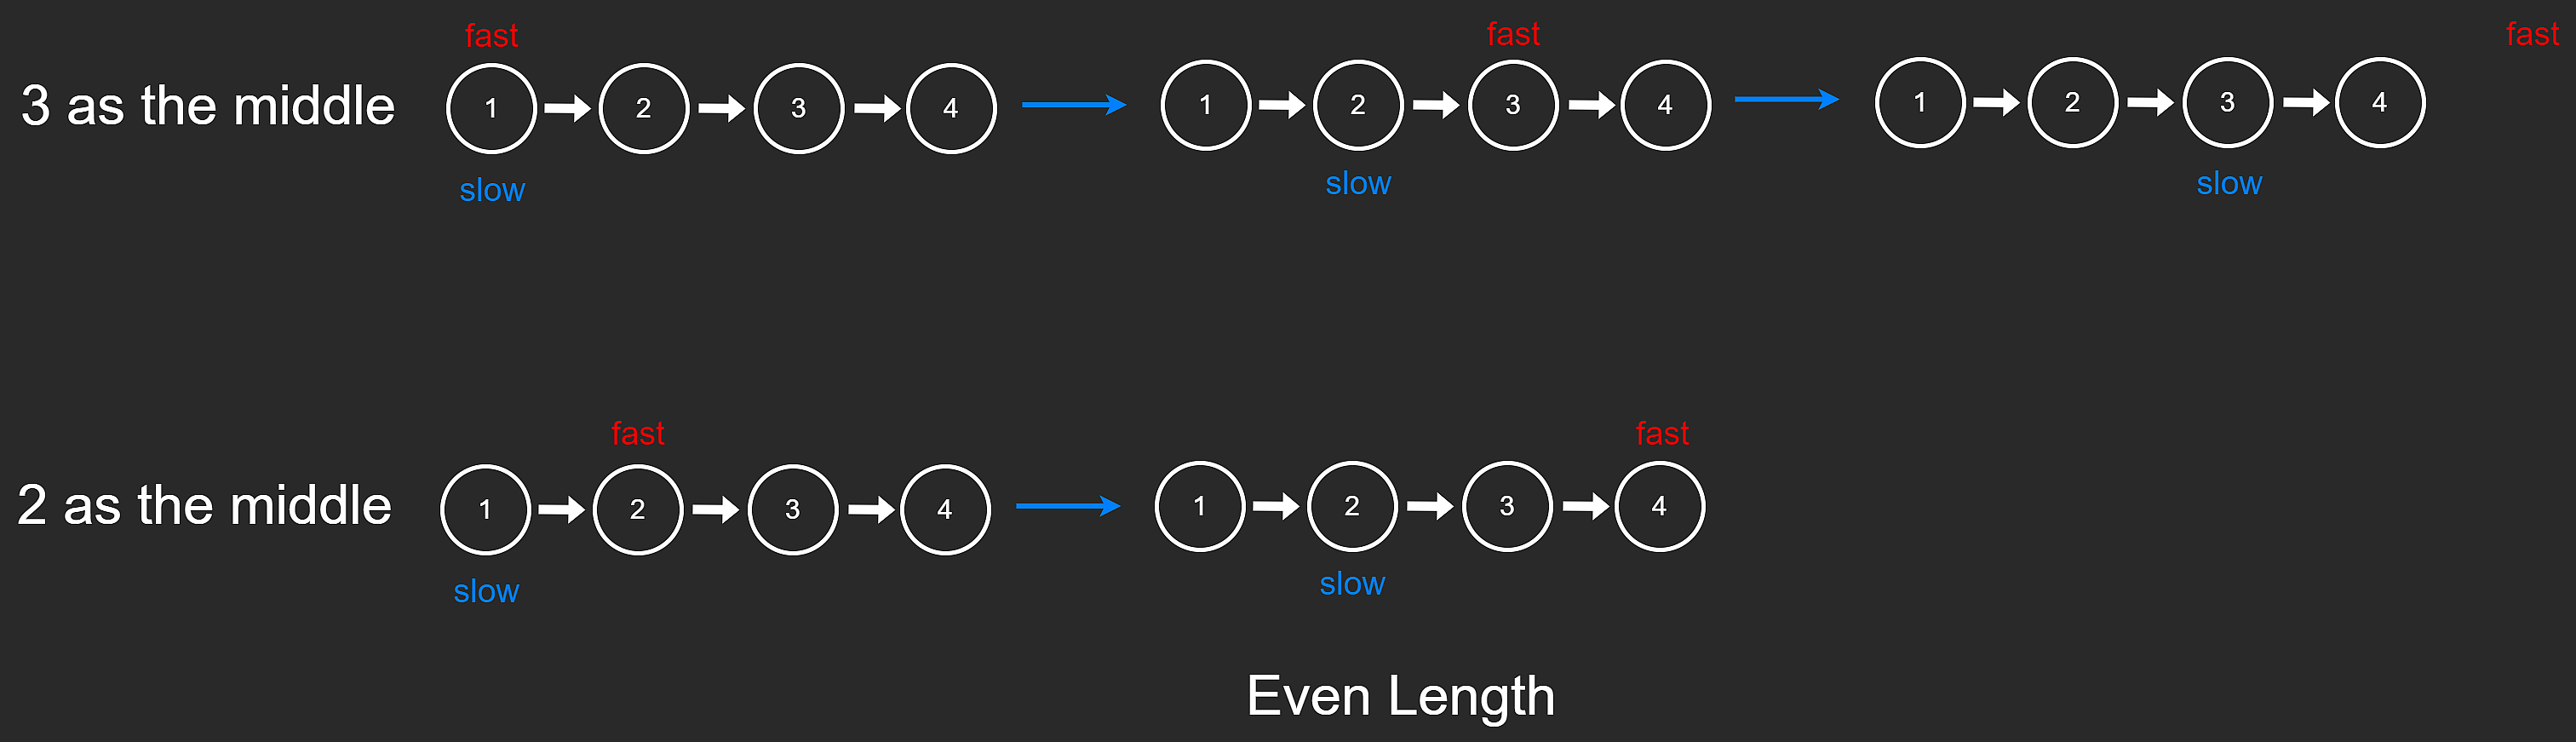

## Cycles

### Cycle Detection

> Q: determine if a linked list has a cycle

If our *linked list* has a cycle, then `fast` will eventually catch up to `slow` as it will never reach `null`.

> note that since each node in a linked list can only point to a single other node, at most only one cycle can exist. 
> 
> One cycle can have multiple entry points, but there cannot be 2 separate cycles. 2 separate cycles would mean that a node will have 2 outgoing cycles which is not possible

Since there is only one cycle, both `slow` and `fast` must enter this cycle at some point. `fast` will be stuck in a cycle, while `slow` enters the cycle later. 
- In this cycle, `fast` will eventually bypass `slow` at some point, as `fast` travels faster than `slow`
- At every iteration, `fast` gets one step closer to `slow`

We start `slow` and `fast` at the head of the linked list. If `slow` and `fast` meet, then we know there's a cycle.

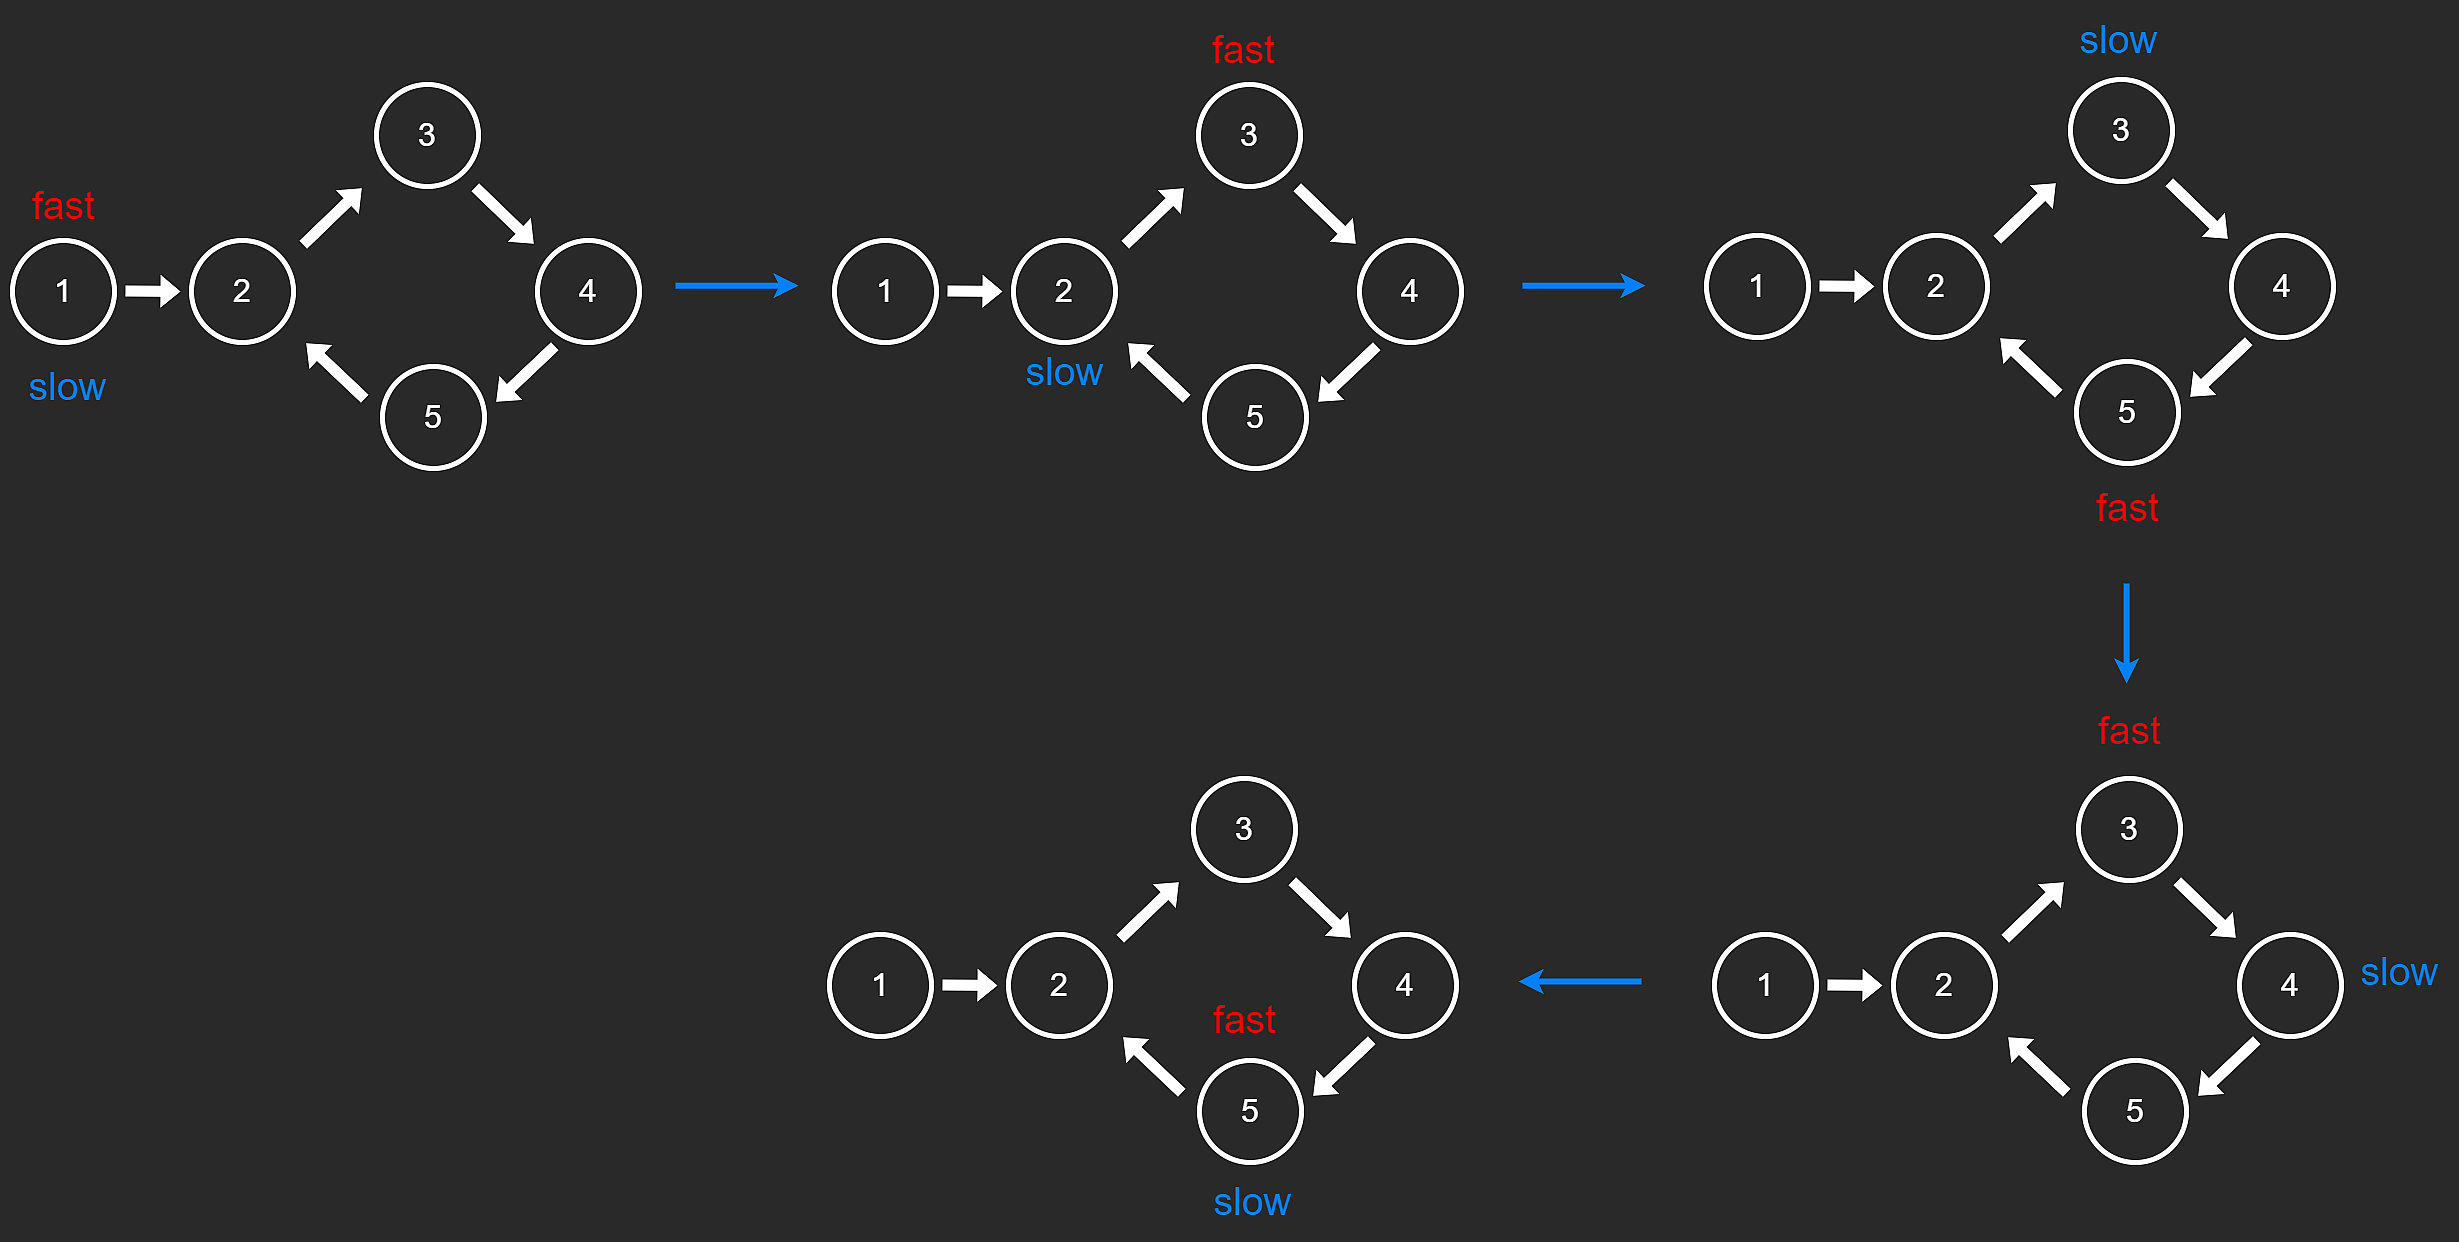


In [ ]:
def hasCycle(head):
    slow, fast = head, head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            return True
    return False

*Note:* we could have used a hashset to detect a cycle; if during traversal a node is repeated then we know there's a cycle.

```python
def hasCycle(head: ListNode) -> bool:
    visited = set()
    while head is not None:
        if head in visited:
            return True
        visited.add(head)
        head = head.next
    return False
```

While this works, this uses $O(n)$ space due to the hashset.

### Get start of cycle

> Q: determine if a LL has a cycle and return the head

Once the `fast` and `slow` have intersected, have another pointer initialize at the start of the whole LL called `slow2`. If node `C` is the start of the cycle, then the distance from start of LL (where `slow2` is) to `C`, and the distance from intersection to `C`, must be equal.

So, if we increment `slow` and `slow2` every iteration, we are guaranteed to arrive at `C`, thereby finding the start of the cycle.

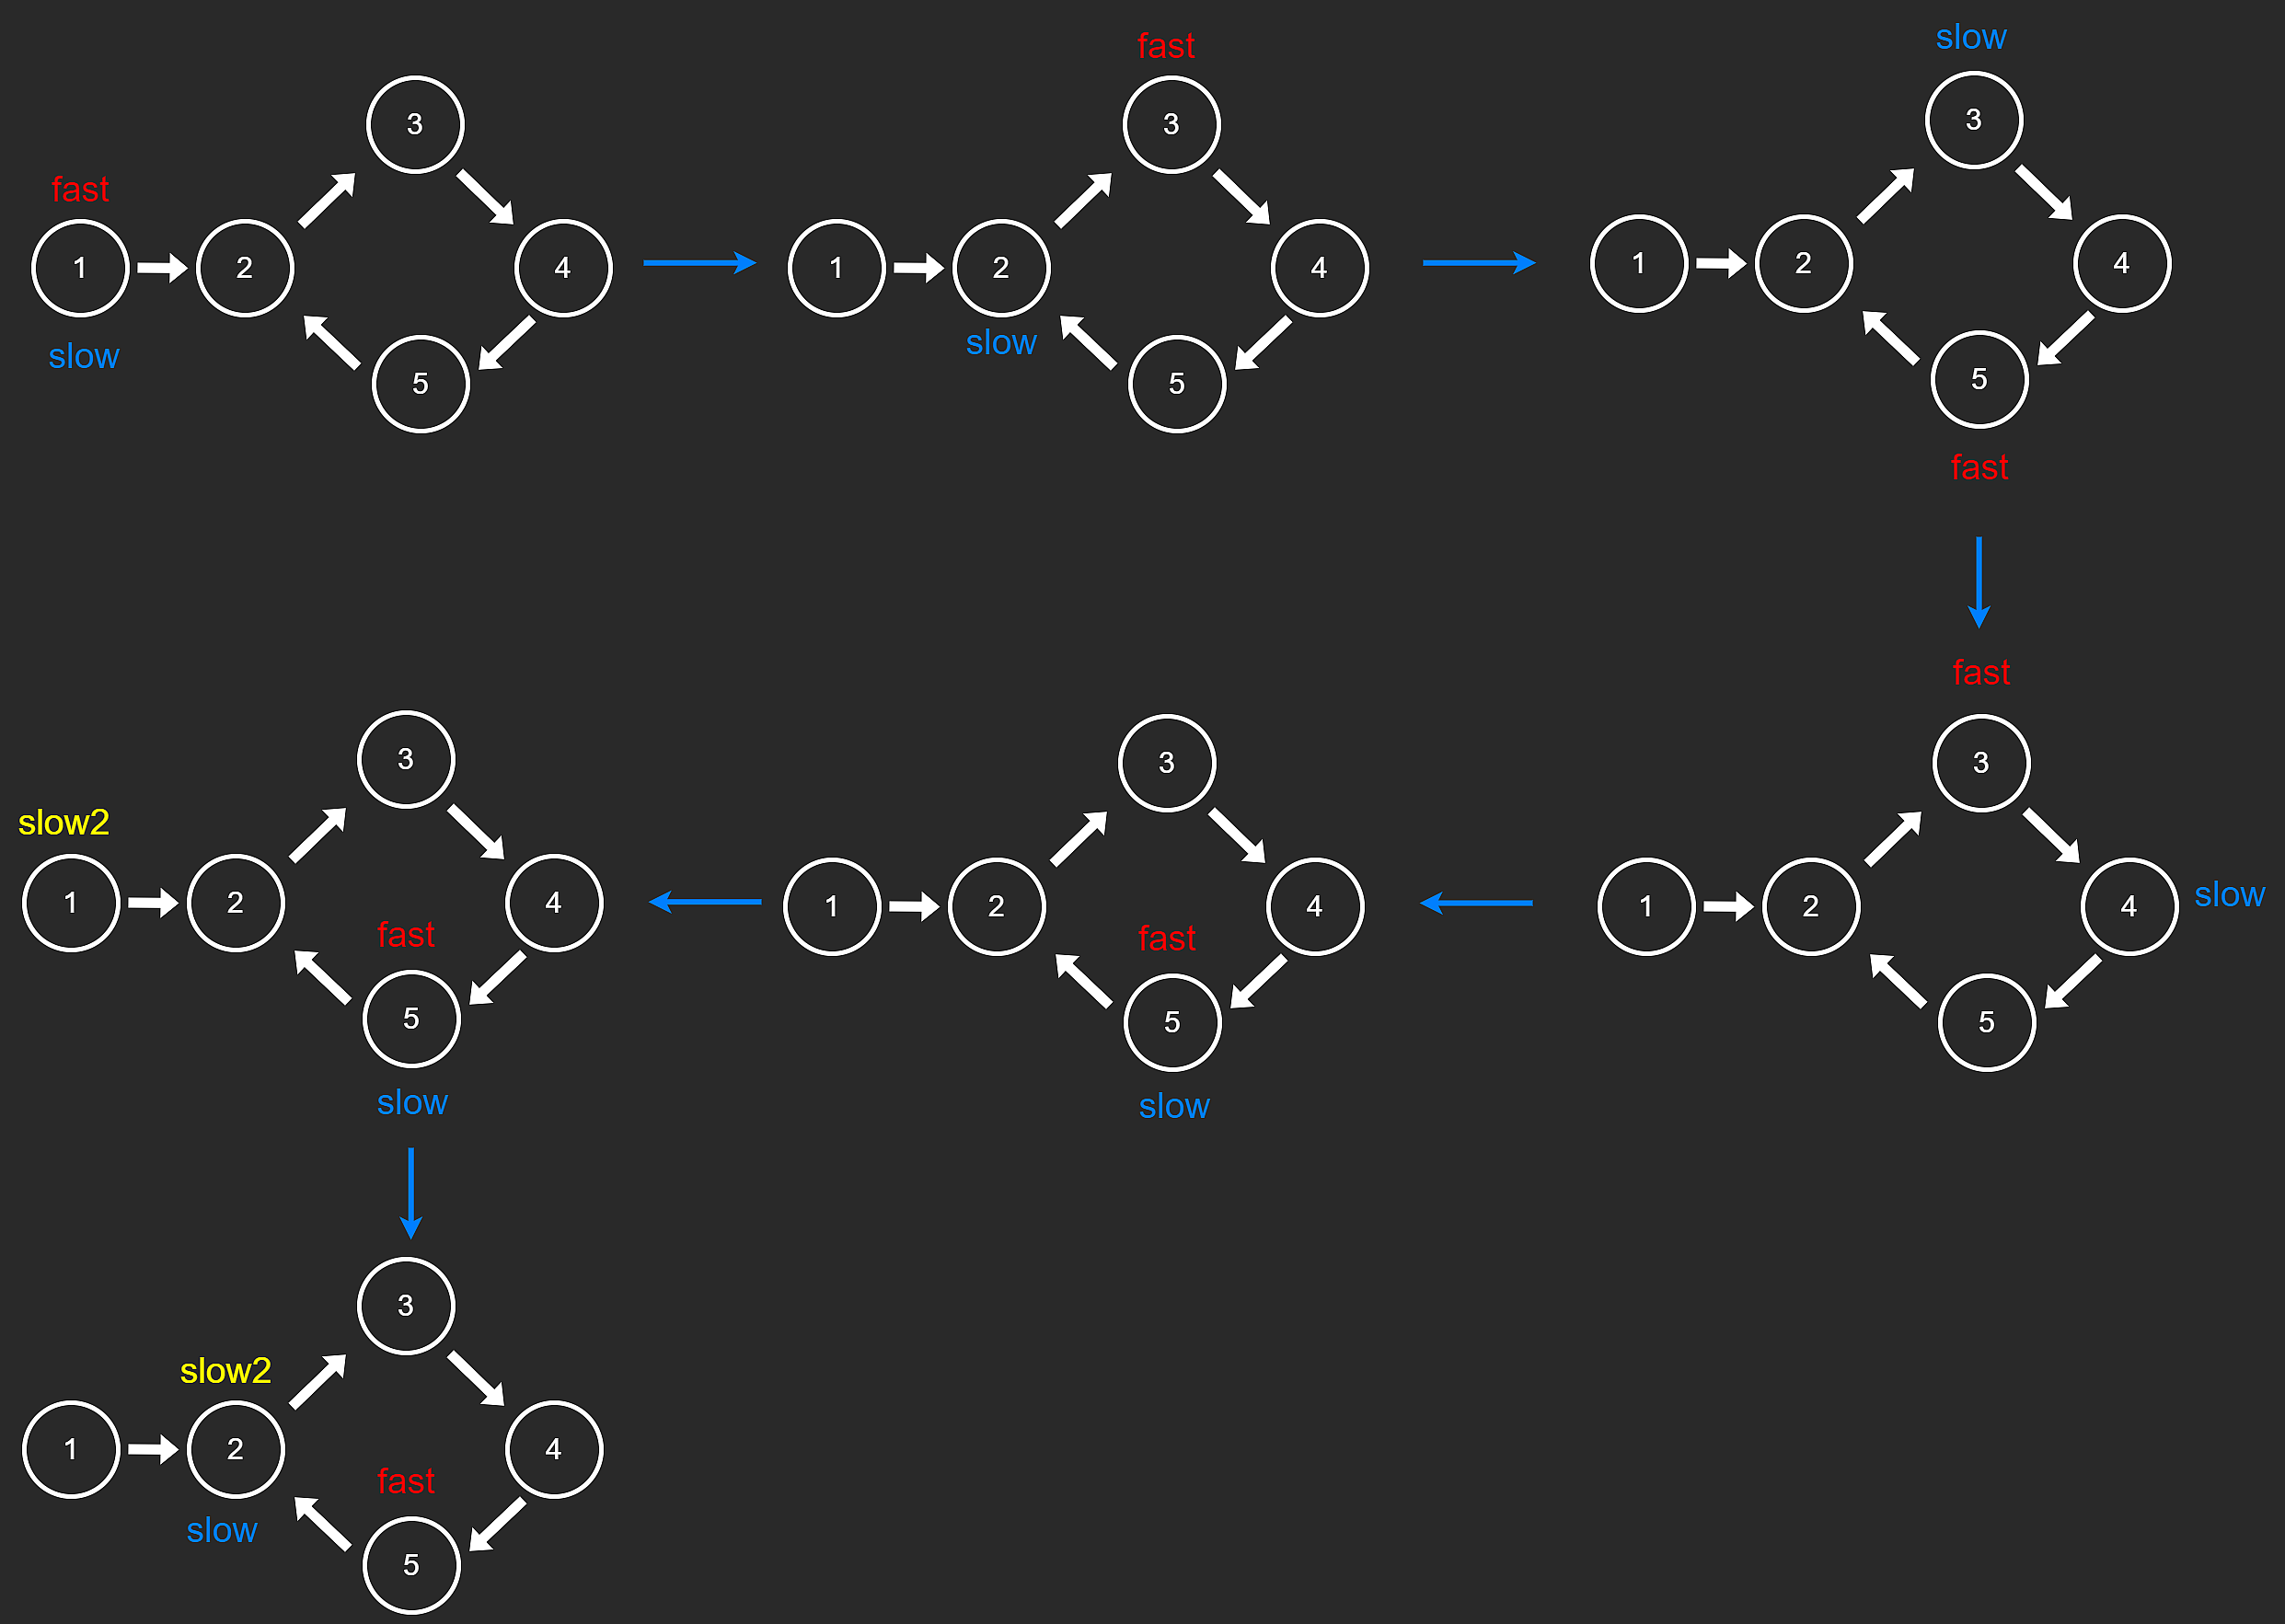

This has $O(n)$ time complexity and $O(1)$ space complexity.

In [ ]:
def cycleStart(head):
    slow, fast = head, head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        #intersection occurs
        if slow == fast:
            break
    
    #no cycle exists
    if not fast or not fast.next:
        return None
    
    #keep advancing slow and slow2 until they meet
    slow2 = head
    while slow != slow2:
        slow = slow.next
        slow2 = slow2.next
    return slow


#### Mathematical Proof for finding the start of cycle

1. Let the distance between head node and the node at which cycle starts be $P$
2. Let the entire length of cycle be $C$
3. Let the distance between the intersection point of `slow` and `fast` to the beginning of the cycle be $X$

Then, the distance between start of cycle and the intersection point is $C-X$.

We also know $2*Distance_{slow}=Distance_{fast}$

Then,
$$ 2(P+C-X)=P+C+C-X $$
as `fast` would have covered one extra lap of length $C$ when it reaches slow. (Not very convinced though). Therefore,
$$ P=X$$

Therefore if we increment 1 slowly, for both `slow` at the intersection and `slow2` at the head of LL, we are guaranteed to meet at the start of the cycle.
